# 1. Importamos la librería

In [3]:
import gplp
import numpy as np
import matplotlib.pyplot as plt


# 2. Generamos datos (line spectra) de manera aleatoria segun los parámetros

Notar que estas señales son sampleadas de manera random segun el esquema que se desee.

Hay tres esquemas, "jitter", "additive" y "full_random". En particular usaremos "jitter".

In [19]:
###############Parameters of the synthetic signal###################################################
L=10   # Domain is [-L,L]
n= 200   # Total number of points
noise_var =0.55   # Gaussian noise variable (Variance of a Normal distribution)
sample =.25   # Total fraction of points to be sampled (n*sample)

#####################################################################################################

low_freqs = np.asarray([0.1,0.2,0.3,0.45])   # Array of low-frequencies to be summed in the signal
high_freqs =np.asarray([0.55,0.7,0.8,0.6,0.65])   # Array of high-frequencies to be summed in the signal
coefs_low =np.asarray([1,2,2,1.5])   # Amplitude of each low-freq signal
coefs_high =np.asarray([1.0,1,2,1,3])   # Amplitude of each high-freq signal}

m = int(n*sample)  # Number of sampled points
window = (low_freqs.max() + high_freqs.min())/2  # Width of the filter


#Uno puede agregar terminos cuadrados si desea probar. En este caso lo seteamos en 0.
W = np.asarray([0.0]) 

W_coeffs = np.pi* np.asarray([0])
######################################################################################################

(y,x_obs,P, f, f_alta, f_baja, x,nyq, noise) = gplp.synth_data(low_freqs,high_freqs,coefs_high= coefs_high, coefs_low= coefs_low, L=L,
                    n=n ,W = W, W_coeffs = W_coeffs, sample= sample, noise_var= noise_var, random_sampling=True, 
                                                               sampling_scheme = "jitter")

# 3. Graphs of synthetic input

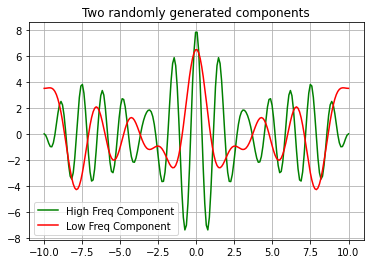

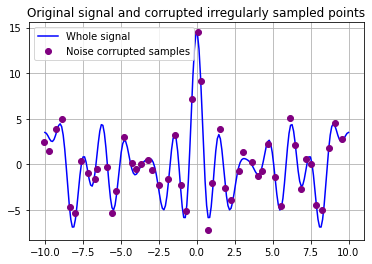

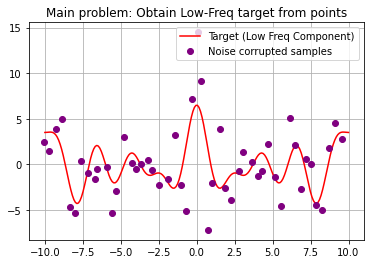

In [28]:
plt.title("Two randomly generated components")
plt.plot(x,f_alta, label = "High Freq Component", color = "g")
plt.plot(x,f_baja, label = "Low Freq Component", color = "r")
plt.legend()
plt.grid()
plt.show()

plt.title("Original signal and corrupted irregularly sampled points")
plt.plot(x, f-noise, label = "Whole signal", color = "b")
plt.plot(x_obs,y, 'o', label = "Noise corrupted samples", color = "purple")
plt.legend()
plt.grid()
plt.show()

plt.title("Main problem: Obtain Low-Freq target from points")
plt.plot(x, f_baja, label = "Target (Low Freq Component)", color = "r")
plt.plot(x_obs,y, 'o', label = "Noise corrupted samples", color = "purple")
plt.legend()
plt.grid()
plt.show()

# 4. Example of GPLP package

Condicion inicial optimizador:  [ 0.39565652  3.25084881 11.86969569]


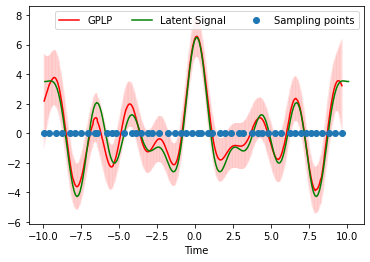

In [43]:
# Define the signal object
# PARAMETERS
# --------------------------------------------------------------------
# x_obs, y : Sampled points
# window: Length of the desired window (natural, i.e in Hz) frequencies
# kernel: the type of kernel for the whole signal. Only "rbf" and "mattern1" are supported
# windowshape: the shape of the filtering window. Only square, triangle and circle are supported
# shift: Wheter or not to shift the window. If set True, the high-freq part of the signal will be deduced.
# grid_num: The number of points to use in the new interpolation
signal = gplp.GPLP(x_obs, y, window=0.5, kernel = "rbf", windowshape = "square", shift = False, grid_num =800)


#Optimization of hyperparameters
signal.train() 

#Filtering 
signal.filt(eval_postcov = True, smoothing=False)

#Plot results
def plot_time(signal,f_baja, filter_butter = None): #Recibe un objeto de GPLP y lo plotea
    if filter_butter is None:
        plt.figure()
        plt.plot(signal.time, signal.filtered,'r', label = 'GPLP') #Ploteo en tiempo de señal filtrada
        plt.plot(x-signal.offset, f_baja, 'g' , label = 'Latent Signal') #Ploteo de la veraddera señal 
        plt.plot(signal.x,np.zeros(len(signal.x)),'o', label = 'Sampling points')   #Ploteo de puntos de muestreo
        plt.errorbar(signal.time,signal.filtered,yerr=signal.error_bar,alpha=0.05,color ='r') #Ploteo de bandas de error
        plt.xlabel('Time')
        plt.legend(loc=1, ncol=3)
        #plt.xlim((0,10))
        plt.savefig('error_bar.pdf', bbox_inches = 'tight')
    else:
        plt.figure()
        plt.plot(signal.time, signal.filtered,'r', label = 'GPLP') #Ploteo en tiempo de señal filtrada
        plt.plot(x-signal.offset, f_baja, 'g' , label = 'Latent Signal') #Ploteo de la veraddera señal 
        plt.plot(signal.x, filter_butter, 'purple', label = 'Butterworth filter')

        plt.plot(signal.x,np.zeros(len(signal.x)),'o', label = 'Sampling times')   #Ploteo de puntos de muestreo
        plt.errorbar(signal.time,signal.filtered,yerr=signal.error_bar,alpha=0.05,color ='r') #Ploteo de bandas de error
        plt.xlabel('Time')
        plt.legend(loc=1, ncol=3)
        #plt.xlim((0,10))
        plt.savefig('error_bar.pdf', bbox_inches = 'tight')
    
plot_time(signal, f_baja)

Condicion inicial optimizador:  [ 0.39565652  3.25084881 11.86969569]


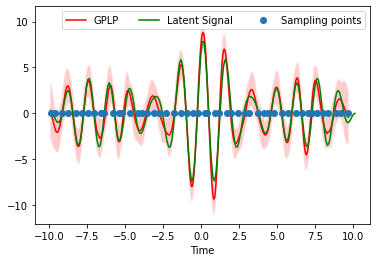

In [45]:
#We change shift to True and now we have a high-pass filter
signal = gplp.GPLP(x_obs, y, window=0.5, kernel = "rbf", windowshape = "square", shift = True, grid_num =800)


#Optimization of hyperparameters
signal.train() 

#Filtering 
signal.filt(eval_postcov = True, smoothing=False)


plot_time(signal, f_alta)